<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading-and-Preparation" data-toc-modified-id="Data-Loading-and-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading and Preparation</a></span><ul class="toc-item"><li><span><a href="#Importing-Required-Libraries" data-toc-modified-id="Importing-Required-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing Required Libraries</a></span></li><li><span><a href="#Open-the-file-and-explore-the-data." data-toc-modified-id="Open-the-file-and-explore-the-data.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Open the file and explore the data.</a></span></li></ul></li><li><span><a href="#Text-Preparation" data-toc-modified-id="Text-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Text Preparation</a></span><ul class="toc-item"><li><span><a href="#Text-cleaning" data-toc-modified-id="Text-cleaning-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Text cleaning</a></span></li><li><span><a href="#Lemmatize,-tokenize,-and-remove-stop-words" data-toc-modified-id="Lemmatize,-tokenize,-and-remove-stop-words-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Lemmatize, tokenize, and remove stop words</a></span></li><li><span><a href="#Let's-check-for-class-imbalance-in-the-target-feature" data-toc-modified-id="Let's-check-for-class-imbalance-in-the-target-feature-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Let's check for class imbalance in the target feature</a></span></li><li><span><a href="#Word-count-and-word-length-in-the-text" data-toc-modified-id="Word-count-and-word-length-in-the-text-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Word count and word length in the text</a></span></li><li><span><a href="#Split-the-data-into-training-and-test-sets" data-toc-modified-id="Split-the-data-into-training-and-test-sets-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Split the data into training and test sets</a></span></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LGBMClassifier</a></span></li></ul></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#Evaluation-of-the-Best-Solution-on-the-Test-Set" data-toc-modified-id="Evaluation-of-the-Best-Solution-on-the-Test-Set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation of the Best Solution on the Test Set</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>


# User Comment Toxicity Analysis

The online store is launching a new service that allows users to edit and enhance product descriptions in a wiki-style community format. Users can suggest edits and comment on changes made by others.  

To maintain a positive environment, the store requires a tool to **detect toxic comments** and send them for moderation.  

**Task**  
Train a model to classify comments as **positive** or **negative** using a labeled dataset.  
The target metric is **F1-score ≥ 0.75**.  

**Selected Models for Evaluation**  
In collaboration with the client, the following models have been chosen for testing:  
- **LogisticRegression**  
- **LGBMClassifier**  
- **DecisionTreeClassifier**  

**Project Plan**  
1. Load and preprocess the data.  
2. Train the models.  
3. Evaluate the models on the test set and draw conclusions.  

**Dataset Description**  
The dataset is stored in **toxic_comments.csv** and contains the following columns:  
- **text** – Comment text  
- **toxic** – Target variable (0 for positive, 1 for toxic)

## Data Loading and Preparation

### Importing Required Libraries

In [1]:
!pip install gensim
!pip install xgboost
!pip install lightgbm
!pip install wordcloud
!pip install tqdm
!pip install matplotlib==3.3.4 seaborn==0.11.1

In [2]:
# 1. Core Libraries
import os
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.notebook import tqdm
import time

# 2. NLTK and Text Processing
import nltk
import re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from matplotlib import rc

# Loading Necessary NLTK Resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# 3. Machine Learning Models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (f1_score, recall_score, precision_score, confusion_matrix)
from sklearn.model_selection import cross_val_score

# 4. NLTK resources
from warnings import simplefilter

# 5. Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# the path to the TrueType
font_path = r'XXXXXX.ttf'

print('Libraries imported')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rx330\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rx330\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rx330\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rx330\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Libraries imported


In [3]:
RANDOM_STATE = 42

Let's write a function to measure the training time of the model.

In [4]:
def measure_training_time(model, X_train, y_train):
    start_time_training = time.time()
    # Training the model on data
    model.fit(X_train, y_train)
    end_time_training = time.time()
    training_time = end_time_training - start_time_training
    return training_time

### Open the file and explore the data.

In [5]:
# Main file path
main_path = r'XXXXX\toxic_comments.csv'
# Alternative file paths
pth1 = '/datasets/toxic_comments.csv'

# Check for the main file; if it doesn't exist, search in other directories.
if os.path.exists(main_path):
    data = pd.read_csv(main_path, index_col=0)
elif os.path.exists(pth1):
    data = pd.read_csv(pth1, index_col=0)
else:
    print('Something is wrong')

In [6]:
display(data.shape)
data.info()
display(data.head(10))

(159292, 2)

<class 'pandas.core.frame.DataFrame'>
Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


The file consists of 159,292 rows and 2 columns.  

The data type of the "toxic" feature can be changed to a more compact one to reduce the table's memory usage.

In [7]:
data['toxic'] = data['toxic'].astype('uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  uint8 
dtypes: object(1), uint8(1)
memory usage: 2.6+ MB


The memory usage has been reduced by 30%.

## Text Preparation

Let's check for duplicates and missing values.

In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

text     0
toxic    0
dtype: int64

No duplicates or missing values were found.

### Text cleaning

We will convert the text to lowercase, remove unnecessary characters and spaces, and keep only English alphabet letters.

In [10]:
tqdm.pandas()

In [11]:
def cleaning(text):
    text = re.sub(r'(?:\n|\r)', ' ', text)
    text = re.sub(r'[^a-zA-Z ]+', ' ', text).strip()
    text = text.lower()
    return text

data['text'] = data['text'].progress_apply(cleaning)
data.head()

  0%|          | 0/159292 [00:00<?, ?it/s]

,text,toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m s...,0
2,hey man i m really not trying to edit war it...,0
3,more i can t make any real suggestions on impr...,0
4,you sir are my hero any chance you remember...,0


### Lemmatize, tokenize, and remove stop words

In [12]:
# Initialization of Stop Words and Lemmatizer
stop_words_set = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
##### Function for part-of-speech mapping
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function for text lemmatization
def lem(text): 
    tokens = word_tokenize(text) 
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(word)) 
        for word in tokens if word.lower() not in stop_words_set
    ]
    return " ".join(lemmatized_tokens)

In [14]:
# Applying the function to the text column
%time data['lemmatized_text'] = data['text'].progress_apply(lem)
data.head(10)

  0%|          | 0/159292 [00:00<?, ?it/s]

CPU times: total: 1h 15min 40s
Wall time: 1h 17min 16s


,text,toxic,lemmatized_text
0,explanation why the edits made under my userna...,0,explanation edits make username hardcore metal...
1,d aww he matches this background colour i m s...,0,aww match background colour seemingly stuck th...
2,hey man i m really not trying to edit war it...,0,hey man really try edit war guy constantly rem...
3,more i can t make any real suggestions on impr...,0,make real suggestion improvement wonder sectio...
4,you sir are my hero any chance you remember...,0,sir hero chance remember page
5,congratulations from me as well use the tools...,0,congratulation well use tool well talk
6,cocksucker before you piss around on my work,1,cocksucker piss around work
7,your vandalism to the matt shirvington article...,0,vandalism matt shirvington article revert plea...
8,sorry if the word nonsense was offensive to ...,0,sorry word nonsense offensive anyway intend wr...
9,alignment on this subject and which are contra...,0,alignment subject contrary dulithgow


In [15]:
print(data.columns)


Index(['text', 'toxic', 'lemmatized_text'], dtype='object')


In [16]:
# Dictionary of replacements for abbreviations
contractions = {
    r"\bi[\' ]m\b": "i am",
    r"\byou[\' ]re\b": "you are",
    r"\bhe[\' ]s\b": "he is",
    r"\bit[\' ]s\b": "it is",
    r"\bcan[\' ]t\b": "cannot",
    r"\bdon[\' ]t\b": "do not",
    r"\baren[\' ]t\b": "are not"
}

# Replacement function
def replace_contractions(text):
    original_text = text  # Saving the original text for comparison
    for contraction, full_form in contractions.items():
        text = re.sub(contraction, full_form, text, flags=re.IGNORECASE)
    return text

# Applying replacements to all texts in the column
data['lemmatized_text'] = data['lemmatized_text'].apply(replace_contractions)

# Viewing the result after replacement
display(data.head(10))

,text,toxic,lemmatized_text
0,explanation why the edits made under my userna...,0,explanation edits make username hardcore metal...
1,d aww he matches this background colour i m s...,0,aww match background colour seemingly stuck th...
2,hey man i m really not trying to edit war it...,0,hey man really try edit war guy constantly rem...
3,more i can t make any real suggestions on impr...,0,make real suggestion improvement wonder sectio...
4,you sir are my hero any chance you remember...,0,sir hero chance remember page
5,congratulations from me as well use the tools...,0,congratulation well use tool well talk
6,cocksucker before you piss around on my work,1,cocksucker piss around work
7,your vandalism to the matt shirvington article...,0,vandalism matt shirvington article revert plea...
8,sorry if the word nonsense was offensive to ...,0,sorry word nonsense offensive anyway intend wr...
9,alignment on this subject and which are contra...,0,alignment subject contrary dulithgow


### Let's check for class imbalance in the target feature

In [17]:
data['toxic'].value_counts()

toxic
0    143106
1     16186
Name: count, dtype: int64

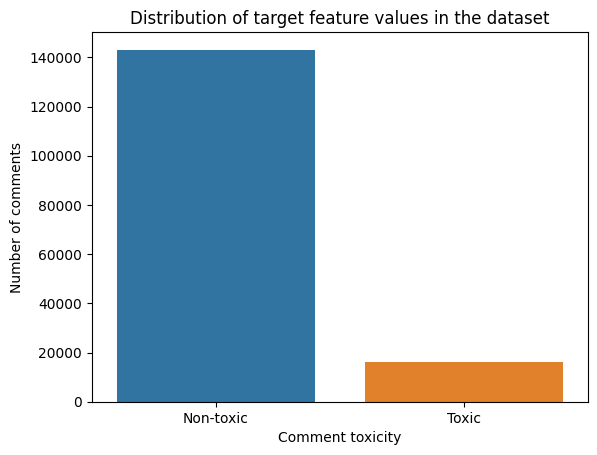

In [18]:
sns.countplot(x='toxic', data=data)  
plt.title('Distribution of target feature values in the dataset')  
plt.xlabel('Comment toxicity')  
plt.ylabel('Number of comments')  
plt.xticks([0, 1], ['Non-toxic', 'Toxic'])  
None

There is a class imbalance, which should be considered when splitting into training and test sets.

### Word count and word length in the text

We can analyze the relationship between sentence length, word complexity, and the target variable. Longer, more complex words may be more common in professional or positive texts, while shorter, simpler words might appear more frequently in negative ones. If a strong correlation is found, these features can be incorporated into the model to improve its ability to distinguish between different text categories, leveraging both linguistic patterns and structural characteristics.

In [19]:
# Download SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initializing SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function for Text Analysis
def analyze_text(row):
    # Count the number of words
    word_count = len(row['text'].split())
    # Calculate the average word length, ensuring no division by zero
    avg_word_length = sum(len(word) for word in row['text'].split()) / word_count if word_count > 0 else 0
    # Compute sentiment score
    sentiment_score = sia.polarity_scores(row['text'])['compound']
    return pd.Series([word_count, avg_word_length, sentiment_score])

# Apply the function to each text entry
data[['word_count', 'avg_word_length', 'sentiment_score']] = data.progress_apply(analyze_text, axis=1)

display(data)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rx330\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  0%|          | 0/159292 [00:00<?, ?it/s]

,text,toxic,lemmatized_text,word_count,avg_word_length,sentiment_score
0,explanation why the edits made under my userna...,0,explanation edits make username hardcore metal...,46.0,4.413043,0.5574
1,d aww he matches this background colour i m s...,0,aww match background colour seemingly stuck th...,16.0,4.562500,0.2263
2,hey man i m really not trying to edit war it...,0,hey man really try edit war guy constantly rem...,44.0,4.227273,-0.1779
3,more i can t make any real suggestions on impr...,0,make real suggestion improvement wonder sectio...,116.0,4.189655,0.4019
4,you sir are my hero any chance you remember...,0,sir hero chance remember page,14.0,3.571429,0.6808
...,...,...,...,...,...,...
159446,and for the second time of asking when your v...,0,second time ask view completely contradicts co...,46.0,4.934783,0.1548
159447,you should be ashamed of yourself that is a ...,0,ashamed horrible thing put talk page,17.0,3.882353,-0.7650
159448,spitzer umm theres no actual article for pr...,0,spitzer umm there actual article prostitution ...,11.0,5.727273,-0.2960
159449,and it looks like it was actually you who put ...,0,look like actually put speedy first version de...,25.0,3.640000,0.3612


Сharts for visualization

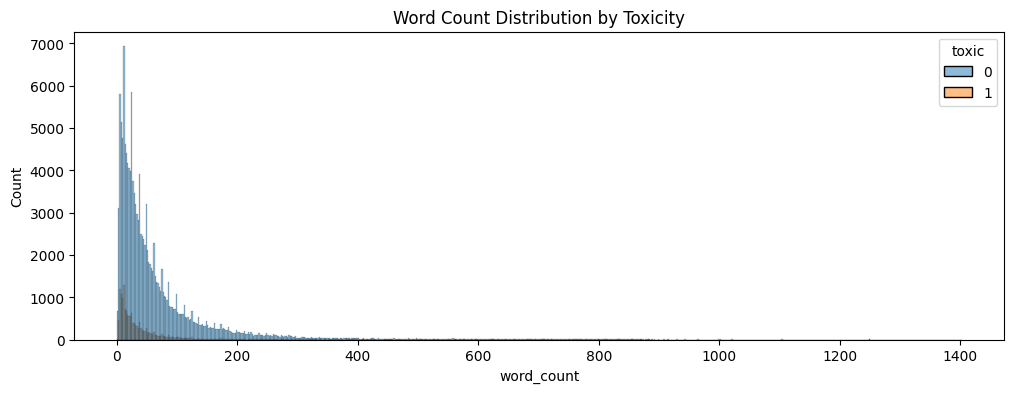

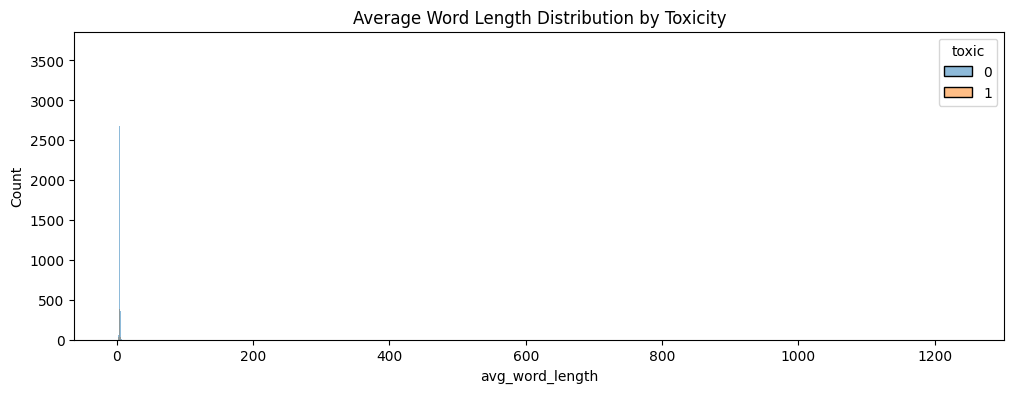

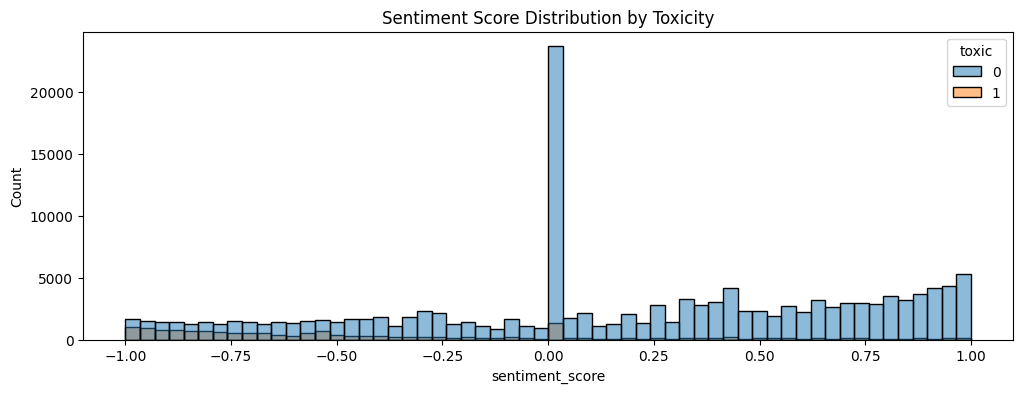

In [20]:
data['toxic'] = data['toxic'].astype(str)  # Преобразуем в строку перед построением графиков

# Histogram for Word Count
plt.figure(figsize=(12, 4))
sns.histplot(data, x='word_count', hue='toxic')
plt.title('Word Count Distribution by Toxicity')
plt.show()

# Histogram for avg_word_length
plt.figure(figsize=(12, 4))
sns.histplot(data, x='avg_word_length', hue='toxic')
plt.title('Average Word Length Distribution by Toxicity')
plt.show()

# Histogram for sentiment_score
plt.figure(figsize=(12, 4))
sns.histplot(data, x='sentiment_score', hue='toxic')
plt.title('Sentiment Score Distribution by Toxicity')
plt.show()

Calculate the correlation

In [21]:
correlations = data[['toxic', 'word_count', 'avg_word_length', 'sentiment_score']].corr()
print(correlations)

                    toxic  word_count  avg_word_length  sentiment_score
toxic            1.000000   -0.046720        -0.000177        -0.307413
word_count      -0.046720    1.000000         0.000347         0.090163
avg_word_length -0.000177    0.000347         1.000000        -0.002351
sentiment_score -0.307413    0.090163        -0.002351         1.000000


**Conclusion**:

- **Correlation between toxic and sentiment_score (-0.307):**  
There is a moderate negative correlation between toxicity and sentiment score. This suggests that more negative texts (with lower sentiment scores) tend to be more toxic. This feature may be useful for the model as it helps distinguish between toxic and non-toxic texts.

- **Correlation between toxic and avg_word_length (-0.0002):**  
The correlation between toxicity and average word length is nearly nonexistent. This means that the average word length in a text does not significantly impact its toxicity level. It is likely that this feature will not contribute much value to the model.

- **Correlation between toxic and word_count (-0.047):**  
The correlation between word count and toxicity is also close to zero, indicating no meaningful relationship between text length (in terms of word count) and its toxicity. This feature is unlikely to have a significant impact on the model’s performance.

- **Correlation between word_count, avg_word_length, and sentiment_score:**  
Word count has a weak positive correlation with sentiment_score (0.090), but the value is very small. Additionally, avg_word_length and sentiment_score show a weak negative correlation (-0.002), providing no meaningful insight into their relationship.

**Final Takeaways**:

- **sentiment_score** is an important feature since it has a moderate correlation with toxicity. It should be included in the model.  
- **avg_word_length and word_count** have weak or zero correlation with toxicity. They can likely be excluded as they may not contribute useful information to the model.

Let's analyze the most frequently occurring words.

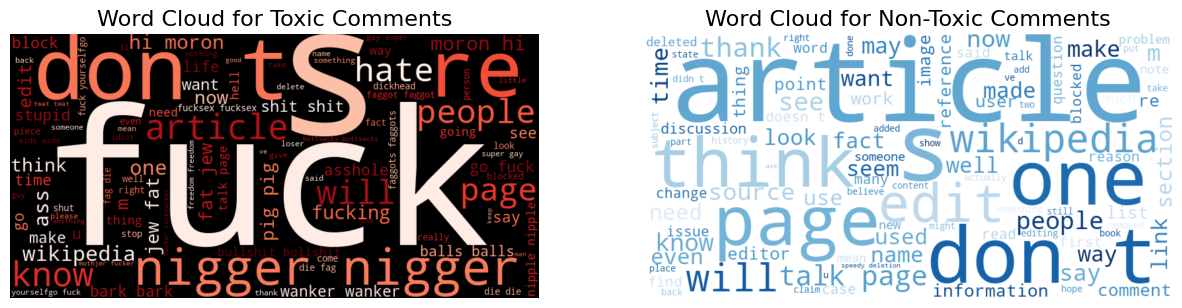

In [22]:
data['toxic'] = data['toxic'].astype('uint8')

# Splitting Text into Toxic and Non-Toxic Comments
toxic_comments = " ".join(data[data['toxic'] == 1]['text'])
non_toxic_comments = " ".join(data[data['toxic'] == 0]['text'])

# Configuring Parameters for Word Clouds
wordcloud_toxic = WordCloud(width=800, height=400, background_color='black', colormap='Reds', max_words=100).generate(toxic_comments)
wordcloud_non_toxic = WordCloud(width=800, height=400, background_color='white', colormap='Blues', max_words=100).generate(non_toxic_comments)

# Creating Charts
plt.figure(figsize=(15, 10))

# Word Cloud for Toxic Comments
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments', fontsize=16)

# Word Cloud for Non-Toxic Comments
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_toxic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments', fontsize=16)

plt.show()

The most frequently occurring word in negative comments is "fuck," while in neutral comments, it is "article."

### Split the data into training and test sets

In [23]:
X = data['lemmatized_text']
y = data['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_STATE, stratify=y)

print(X_train.shape[0])
print(X_test.shape[0])

79646
79646


The data has been processed and split, and it is ready for model training.

**Conclusion:**  
- The file consists of 159,292 rows and 5 columns; no missing values or duplicates were found.  
- There is a class imbalance.  
- Texts have been converted to lowercase, retaining only English alphabet letters.  
- Texts have been tokenized and lemmatized using WordNetLemmatizer.  
- The dataset has been split into training and test sets in a 50/50 ratio while preserving the target variable's distribution.

## Training

Let's write functions to display the progress of code execution.

In [24]:
# Configuring `tqdm` to work with `GridSearchCV`.
class TqdmSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = np.prod([len(v) for params in self.param_grid for v in params.values()])

        with tqdm(total=n_candidates) as pbar:
            def _callback():
                pbar.update(1)
            self._callback = _callback
            
            print(f"Shape X: {X.shape}, Shape y: {y.shape}")
            print(f"Parameters: {self.param_grid}")

            super().fit(X, y, **fit_params)
        pbar.close()

In [25]:
# Creating a wrapper for `RandomizedSearchCV` to add a progress indicator.
class TqdmRandomizedSearchCV(RandomizedSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = self.n_iter  # Number of search iterations.
        with tqdm(total=n_candidates) as pbar:
            def _callback(*args):
                pbar.update(1)
            self._callback = _callback
            return super().fit(X, y, **fit_params)

### LogisticRegression

In [26]:
simplefilter(action='ignore', category=FutureWarning)

# Initialize the model
model = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced', max_iter=1000)

pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words_set, sublinear_tf=True)),
    ('logreg', model)
])

# Hyperparameters for search
param_grid = [
    {'tfidf__ngram_range': ((1,1), (1,2)),
     'logreg__C': [0.1, 1, 10]}
]

# GridSearchCV with a progress indicator to find the best C parameter
lr = TqdmSearchCV(pipeline_lr, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

# Training with cross-validation for hyperparameter C tuning
%time lr.fit(X_train, y_train)

# Best model, best F1 score, and best parameters
best_model_lr = lr.best_estimator_
best_score_lr = round(lr.best_score_, 4)
best_params_lr = lr.best_params_

# Measure training time of the best model
training_time_lr = measure_training_time(best_model_lr, X_train, y_train)

# Display results
print(f"Training time of the best model: {training_time_lr:.4f} seconds")
print("Best F1 score:", best_score_lr)
print("Best C parameter:", best_params_lr)

  0%|          | 0/6 [00:00<?, ?it/s]

Shape X: (79646,), Shape y: (79646,)
Parameters: [{'tfidf__ngram_range': ((1, 1), (1, 2)), 'logreg__C': [0.1, 1, 10]}]
CPU times: total: 1min 44s
Wall time: 8min 4s
Training time of the best model: 80.1783 seconds
Best F1 score: 0.774
Best C parameter: {'logreg__C': 10, 'tfidf__ngram_range': (1, 2)}


In [27]:
table = pd.DataFrame([['LogisticRegression', training_time_lr, best_params_lr, best_score_lr]],
                    columns=['Model', 'Training time', 'Params', 'F1'])
table

,Model,Training time,Params,F1
0,LogisticRegression,80.178313,"{'logreg__C': 10, 'tfidf__ngram_range': (1, 2)}",0.774


### LGBMClassifier

In [28]:
# Creating the LightGBM model
model_LGMB = LGBMClassifier(class_weight='balanced', random_state=RANDOM_STATE, verbose=-1)

pipeline_LGMB = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words_set, sublinear_tf=True)),
    ('LGMB', model_LGMB)
])

# Hyperparameters for tuning
param_grid = {
    'tfidf__ngram_range': ((1,1),(1,2)),
    'LGMB__learning_rate': [0.1, 1],
    'LGMB__n_estimators': [x for x in range(10,51,10)]
}

# RandomizedSearchCV with a progress indicator
lgbm = TqdmRandomizedSearchCV(
    pipeline_LGMB,
    param_distributions=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=1
)

# Training the model
%time lgbm.fit(X_train, y_train)

# Training the best model and measuring time
best_model_lgbm = lgbm.best_estimator_

training_time_lgbm = measure_training_time(best_model_lgbm, X_train, y_train)
lgbm_best_params = lgbm.best_params_
lgbm_best_score = round(lgbm.best_score_, 4)

print(f"Training time of the best model: {training_time_lgbm:.4f} seconds")
print("Best Parameters:", lgbm_best_params)
print("Best F1 score:", lgbm_best_score)

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: total: 28min 13s
Wall time: 17min 18s
Training time of the best model: 82.4355 seconds
Best Parameters: {'tfidf__ngram_range': (1, 2), 'LGMB__n_estimators': 50, 'LGMB__learning_rate': 1}
Best F1 score: 0.7072


In [29]:
table.loc[len(table.index )] = ['LGBMClassifier', training_time_lgbm, lgbm_best_params, lgbm_best_score]
table

,Model,Training time,Params,F1
0,LogisticRegression,80.178313,"{'logreg__C': 10, 'tfidf__ngram_range': (1, 2)}",0.7740
1,LGBMClassifier,82.435481,"{'tfidf__ngram_range': (1, 2), 'LGMB__n_estima...",0.7072


## DecisionTreeClassifier

In [30]:
# Creating the model
model_tree = DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE)

pipeline_tree = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words_set, sublinear_tf=True)),
    ('TREE', model_tree)
])

# Hyperparameters for tuning
param_grid = [
    {'tfidf__ngram_range': ((1,1),(1,2)),
     'TREE__max_depth': [x for x in range(30,51,5)]}]

# RandomizedSearchCV with a progress indicator
tree = TqdmSearchCV(
    pipeline_tree, 
    param_grid=param_grid, 
    cv=3, 
    scoring='f1',
    n_jobs=-1)

# Training the model
%time tree.fit(X_train, y_train)

# Training the best model and measuring time
best_model_tree = tree.best_estimator_

training_time_tree = measure_training_time(best_model_tree, X_train, y_train)
tree_best_params = tree.best_params_
tree_best_score = round(tree.best_score_, 4)

print(f"Training time of the best model: {training_time_lgbm:.4f} seconds")
print("Best Parameters:", lgbm_best_params)
print("Best F1 score:", lgbm_best_score)

  0%|          | 0/10 [00:00<?, ?it/s]

Shape X: (79646,), Shape y: (79646,)
Parameters: [{'tfidf__ngram_range': ((1, 1), (1, 2)), 'TREE__max_depth': [30, 35, 40, 45, 50]}]
CPU times: total: 40.6 s
Wall time: 40min 7s
Training time of the best model: 82.4355 seconds
Best Parameters: {'tfidf__ngram_range': (1, 2), 'LGMB__n_estimators': 50, 'LGMB__learning_rate': 1}
Best F1 score: 0.7072


In [31]:
table.loc[len(table.index )] = ['DecisionTreeClassifier', training_time_tree, tree_best_params, tree_best_score]
table

,Model,Training time,Params,F1
0,LogisticRegression,80.178313,"{'logreg__C': 10, 'tfidf__ngram_range': (1, 2)}",0.7740
1,LGBMClassifier,82.435481,"{'tfidf__ngram_range': (1, 2), 'LGMB__n_estima...",0.7072
2,DecisionTreeClassifier,30.684591,"{'TREE__max_depth': 45, 'tfidf__ngram_range': ...",0.6375


The best results were achieved by the LogisticRegression model, so we will use it to predict the sentiment of the text on the test set.

## Evaluation of the Best Solution on the Test Set

In [32]:
pred = best_model_lr.predict(X_test)

f1_test_score = round(f1_score(y_test, pred), 2)
precision_test_score = round(precision_score(y_test, pred), 2)
recall_test_score = round(recall_score(y_test, pred), 2)

print('F1 score on the test set:', f1_test_score)
print('Precision on the test set:', precision_test_score)
print('Recall on the test set:', recall_test_score)

F1 score on the test set: 0.78
Precision on the test set: 0.78
Recall on the test set: 0.79


Constructing the Confusion Matrix

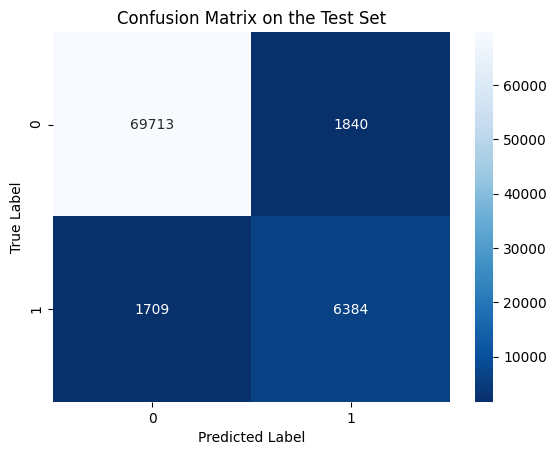

In [33]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix on the Test Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Identifying the Most Important Words for Classification According to the Model

In [34]:
tfidf = best_model_lr.named_steps['tfidf']
tfidf.fit(X_train)  
# Retrieving the List of Features
feature_names = tfidf.get_feature_names()
feature_names

['aa',
 'aa aa',
 'aa accord',
 'aa accuse',
 'aa along',
 'aa already',
 'aa article',
 'aa baltimore',
 'aa bb',
 'aa bbc',
 'aa best',
 'aa border',
 'aa bust',
 'aa cause',
 'aa change',
 'aa could',
 'aa different',
 'aa dog',
 'aa edits',
 'aa end',
 'aa even',
 'aa filter',
 'aa former',
 'aa framerate',
 'aa full',
 'aa give',
 'aa honestly',
 'aa ja',
 'aa jpg',
 'aa likewise',
 'aa literature',
 'aa make',
 'aa ment',
 'aa might',
 'aa namely',
 'aa page',
 'aa play',
 'aa prove',
 'aa put',
 'aa really',
 'aa require',
 'aa resident',
 'aa samael',
 'aa since',
 'aa street',
 'aa svc',
 'aa talk',
 'aa three',
 'aa vertical',
 'aa well',
 'aa wikipedia',
 'aaa',
 'aaa dea',
 'aaa im',
 'aaa mean',
 'aaa pad',
 'aaa page',
 'aaa rat',
 'aaaa',
 'aaaa aa',
 'aaaaaaaaaah',
 'aaaaaaaaaahhhhhhhhhhhhhh',
 'aaaaaaaaadm',
 'aaaaaaaaadm rw',
 'aaaaaaaaaq',
 'aaaaaaaaaq kpiivnfneei',
 'aaaaaaaacfo',
 'aaaaaaaacfo expz',
 'aaaaaaaaczy',
 'aaaaaaaaczy zwr',
 'aaaaaaaahhhhhhhhhhhhhhhhhhh

In [35]:
# Extracting coefficients and feature names
coefficients = best_model_lr.named_steps['logreg'].coef_.tolist()[0]
feature_names = best_model_lr.named_steps['tfidf'].get_feature_names()

# Creating a DataFrame for better analysis
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Identifying the most important feature based on the absolute coefficient value
most_important_feature = coefficients_df.loc[coefficients_df['Coefficient'].abs().idxmax()]

# Displaying the most important feature
print("Most important feature for the logistic regression model:")
print(most_important_feature)

Most important feature for the logistic regression model:
Feature             fuck
Coefficient    47.070779
Name: 497985, dtype: object


## Conclusions

During the text sentiment prediction project, the following work was carried out:

- The client provided a file containing **159,292 rows and 3 columns**. No missing values or duplicates were found.  
- The data was converted to **lowercase**, unnecessary symbols and spaces were removed, and only English alphabet letters were retained.  
- **Lemmatization (WordNetLemmatizer), tokenization (word_tokenize), and stop-word removal** were performed.  
- The data was **vectorized using TF-IDF**.  
- The dataset was split into **training and test sets (50/50)** while maintaining the proportions of the target variable.  

**Model Training**
To identify the best model, three classifiers were trained:  

- **LogisticRegression**  
- **LGBMClassifier**  
- **DecisionTreeClassifier**  

The training results are presented in the table below.

In [36]:
table

,Model,Training time,Params,F1
0,LogisticRegression,80.178313,"{'logreg__C': 10, 'tfidf__ngram_range': (1, 2)}",0.7740
1,LGBMClassifier,82.435481,"{'tfidf__ngram_range': (1, 2), 'LGMB__n_estima...",0.7072
2,DecisionTreeClassifier,30.684591,"{'TREE__max_depth': 45, 'tfidf__ngram_range': ...",0.6375


The model's performance was evaluated using the F1 metric, which, according to the requirement, should not be lower than 0.75.

The best-performing model is **LogisticRegression**, with the following metrics:  
- **F1 score on the training set:** 0.77  
- **F1 score on the test set:** 0.77